In [101]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt

# df = pd.read_csv('Image_classification_data/data_labels_mainData.csv')

In [102]:
import tensorflow
import pandas as pd
import numpy as np
print(tensorflow.__version__)

2.12.0


In [103]:
from google.colab import drive
drive.mount('/content/drive')
# drive.mount("/content/drive/MyDrive/COSC2673")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
!ls /content/drive/'MyDrive'/'COSC2673'

COSC2673_Assignment2.ipynb  Image_classification_data


In [105]:
! pwd

/content


In [106]:
locationMain = "https://raw.githubusercontent.com/s2105802-Nelson/COSC2673-A2-Group42/main/Image_classification_data/data_labels_mainData.csv?token=GHSAT0AAAAAAB66J46AHYJ3PZY64K27X4MQZCIRGJQ"
locationExtra = "https://raw.githubusercontent.com/s2105802-Nelson/COSC2673-A2-Group42/main/Image_classification_data/data_labels_extraData.csv?token=GHSAT0AAAAAAB66J46B5PRZN4MGBL36FXGUZCIRGWQ"

locationMain = "/content/drive/MyDrive/COSC2673/Image_classification_data/data_labels_mainData.csv"
locationExtra = "/content/drive/MyDrive/COSC2673/Image_classification_data/data_labels_extraData.csv"
dfMain = pd.read_csv(locationMain)
dfExtra = pd.read_csv(locationExtra)

In [107]:
dfMain.shape

(9896, 6)

In [108]:
dfMain.head()

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous
0,22405,1,22405.png,fibroblast,0,0
1,22406,1,22406.png,fibroblast,0,0
2,22407,1,22407.png,fibroblast,0,0
3,22408,1,22408.png,fibroblast,0,0
4,22409,1,22409.png,fibroblast,0,0


In [109]:
dfMain.dtypes

InstanceID       int64
patientID        int64
ImageName       object
cellTypeName    object
cellType         int64
isCancerous      int64
dtype: object

In [110]:
cancerous = dfMain[dfMain.isCancerous == 1]
benign = dfMain[dfMain.isCancerous == 0]
cancerous.shape

(4079, 6)

In [111]:
benign.shape

(5817, 6)

In [112]:
# Load images from zip file
! cp /content/drive/'MyDrive'/'COSC2673'/Image_classification_data/patch_images.zip .
! unzip -q -o patch_images.zip
# ! rm patch

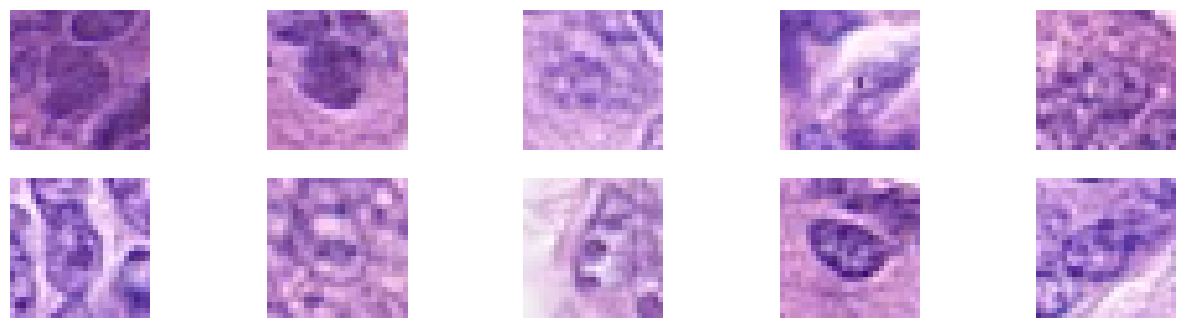

In [113]:
from PIL import Image

r_inx = np.random.choice(cancerous.index, 10)
rand_data = cancerous.loc[r_inx,'ImageName']

plt.figure(figsize=(16,4))
for i, image_path in enumerate(rand_data):
    im = np.asarray(Image.open('patch_images/'+image_path))
    plt.subplot(2,5,i+1)
    plt.imshow(im,cmap='gray')
    plt.axis('off')

# plt.title("Cancerous Cell Images")
plt.show()

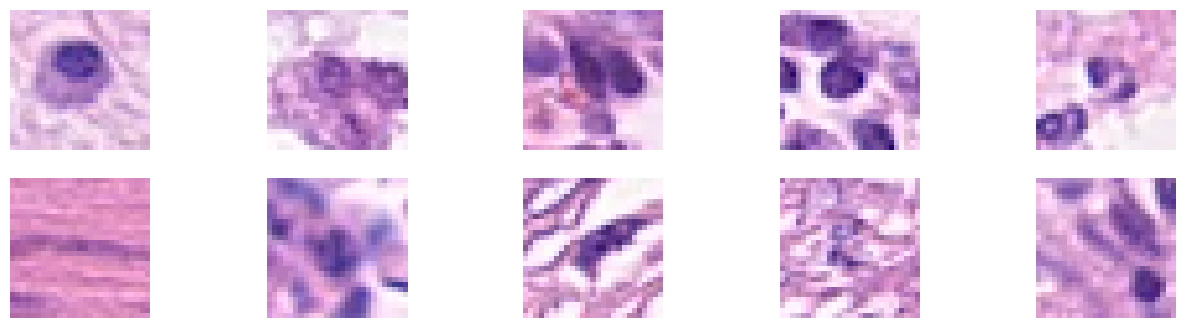

In [114]:
from PIL import Image

r_inx = np.random.choice(benign.index, 10)
rand_data = benign.loc[r_inx,'ImageName']

plt.figure(figsize=(16,4))
for i, image_path in enumerate(rand_data):
    im = np.asarray(Image.open('patch_images/'+image_path))
    plt.subplot(2,5,i+1)
    plt.imshow(im,cmap='gray')
    plt.axis('off')

# plt.title("Normal Cell Images") 
plt.show()

In [115]:
from sklearn.model_selection import train_test_split
train_df,test_df = train_test_split(dfMain,test_size=0.2,shuffle=True,random_state=1212125)

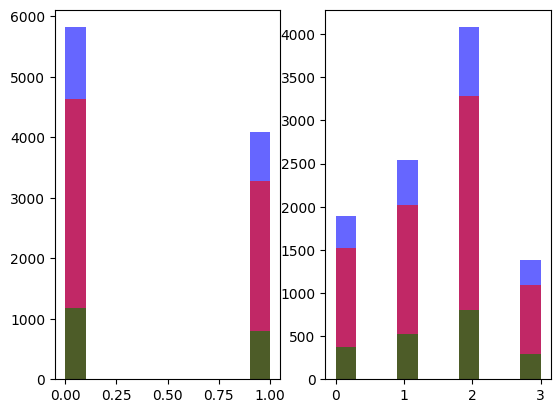

In [121]:
for i,col in enumerate(dfMain[['isCancerous','cellType']]):
  plt.subplot(1,2,i+1)
  plt.hist(dfMain[col],alpha=0.6,color='b')
  plt.hist(train_df[col],alpha=0.6,color='r')
  plt.hist(test_df[col],alpha=0.6,color='g')

In [122]:
INPUT_DIM = (28,28,3)
HIDDEN_LAYER_DIM = 256
OUTPUT_CLASSES = 4

In [123]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='sigmoid'),
    tf.keras.layers.Dense(OUTPUT_CLASSES)
])

In [124]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2352)              0         
                                                                 
 dense (Dense)               (None, 256)               602368    
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 603,396
Trainable params: 603,396
Non-trainable params: 0
_________________________________________________________________


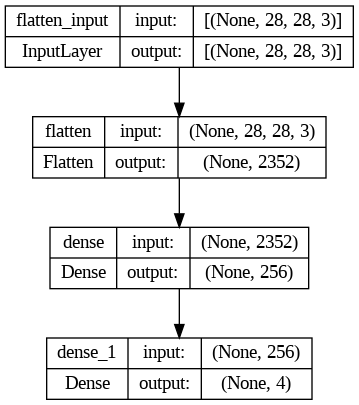

In [125]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [126]:
model.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])